# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

**We Know Companies are listed in stock market and we are the retail investors who wants to earn handsome money by investing in the stock market.**

**But stock market movements are very unpredictable and putting hard earned money can make you a big loss.**

**My aim today is to study the monthly closing of stock using the data available with me. I have data available is of Yes Bank.**



# **GitHub Link -**

https://github.com/ShrinarayanP/ML_Projects

# **Problem Statement**


**We have Yes Bank Data, Since the dependent variable of the data is a continous type, we use a regression model to predict the outcome i.e. the closing of yes bank stock price the next month.**

**We will analyze the given data first by using EDA tools and visualization tools to find insights**

**Then We will use Machine Learning algorithms to find the relation between our data's input variables and output variable i.e. the stock price, This will help us identify how the changes in our data will change our stock price closing and thus we can make a good and most likely prediction of future values.**




# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np # to use mathematical tools and arrays
import pandas as pd # to read and change data
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

from sklearn.model_selection import train_test_split # to split data into train and test
from sklearn.linear_model import LinearRegression # to fit our X and y to get the predictions
from sklearn.linear_model import Ridge, Lasso # to fit our X and y with regulariztion
from sklearn.metrics import r2_score, mean_squared_error # to check the quality of fit
from sklearn.model_selection import GridSearchCV # for hyper parameter tuning and cross validation
from sklearn.preprocessing import OneHotEncoder # for encoding categorical data
from sklearn.compose import ColumnTransformer # for transformation of categorical values
from sklearn.preprocessing import StandardScaler, MinMaxScaler # for standardization of data
from statsmodels.stats.outliers_influence import variance_inflation_factor # used to detect the multicollinearity


### Dataset Loading

In [2]:
# Mounting my Drive to get the saved data needed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading Dataset
dataset = pd.read_csv('/content/drive/MyDrive/AIma Better/ML/data_YesBank_StockPrices.csv')

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
a,b = dataset.shape
print(f"Number of Rows = {a}")
print(f"Number of Columns = {b}")

Number of Rows = 185
Number of Columns = 5


### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
sum(dataset.duplicated())

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

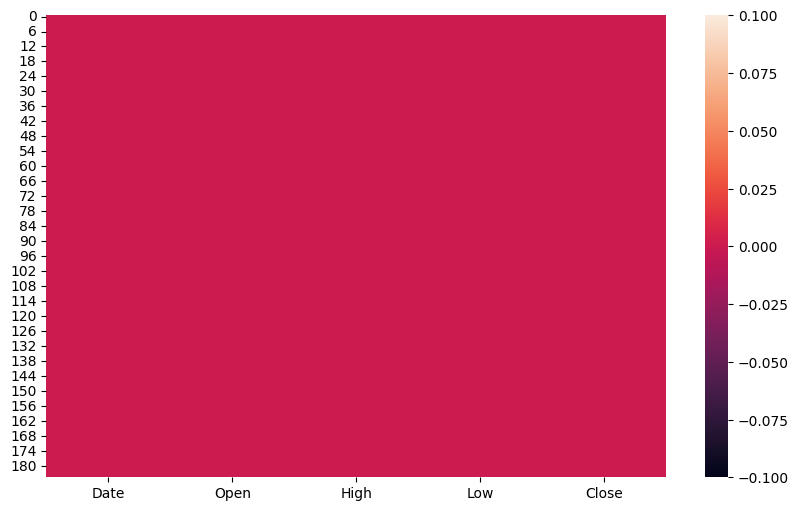

In [10]:
# Visualizing the missing values
plt.figure(figsize = (10,6))
sns.heatmap(dataset.isnull())

### What did you know about your dataset?

The Given Data set is stock price monthly variation of YES BANK and we need to predict the future monthly stock price of YES BANK.

Stock Price prediction is an analytical study on the behaviour of stock price with other factors which we will study further in this project.

My data set has 185 columns and 5 rows, it has no missing values and no duplicate values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [12]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

**Date** : Month of the Year of which other variables are.

**Open** : The opening price in that month

**High** : The highest price stock attained that month

**Low** : The lowest price stock attained that month

**Close** : The closing price of that month (What we want to predict)

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for features in dataset.columns:
  print(f'The Unique values in {features} = {dataset[features].nunique()}.')

The Unique values in Date = 185.
The Unique values in Open = 183.
The Unique values in High = 184.
The Unique values in Low = 183.
The Unique values in Close = 185.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

# we find average of each variable to try understand its avg behaviour
print(f"closing avg = {dataset['Close'].agg('mean')}.")
print(f"opening avg = {dataset['Open'].agg('mean')}.")
print(f"avg highs = {dataset['High'].agg('mean')}.")
print(f"avg lows = {dataset['Low'].agg('mean')}.")

# We find that closing and opening are on an avg same which denotes not much variations in stock price for monthly invetment.
# monthly investment could be a bad idea
# also we see that there is nearly a deviation of 11 rs from avg. monthly closing and opening values,
# a investor can bet if stock price is near to 95 and should sell at 116 in a short term.


closing avg = 105.2047027027027.
opening avg = 105.5414054054054.
avg highs = 116.10432432432432.
avg lows = 94.94783783783782.


In [15]:
# Here I am tring to look for how many months my closing is above avg. closing
print(dataset.count()-dataset[dataset['Close']<dataset['Close'].agg('mean')].count())
# I found that for 62 times my avg. closing is lower than the actual closing price which is almost half the times of reverse case.
# This means my stock is giving bigger peak & avg. differences compared to avg. & low differences.
# Thus we can say that the stock is giving false rises which makes it a riskier stock to invest.


Date     62
Open     62
High     62
Low      62
Close    62
dtype: int64


In [16]:
df = dataset.copy() # creating a copy 'df' of my original dataset
df['high_open_ratio'] = df['High']/df['Open'] # creating a new feature to learn the ratio of month high w.r.t. month open price.
df['close_low_ratio'] = df['Close']/df['Low'] # creating a new feature to learn the ratio of month close w.r.t. month low price.
df.head()

,Date,Open,High,Low,Close,high_open_ratio,close_low_ratio
0,Jul-05,13.00,14.00,11.25,12.46,1.076923,1.107556
1,Aug-05,12.58,14.88,12.55,13.42,1.182830,1.069323
2,Sep-05,13.48,14.87,12.27,13.30,1.103116,1.083945
3,Oct-05,13.20,14.47,12.40,12.99,1.096212,1.047581
4,Nov-05,13.35,13.88,12.88,13.41,1.039700,1.041149


In [17]:
df[df['high_open_ratio']>1.3].count() # checking how many months have made highs by 30% and more compared to its open

Date               14
Open               14
High               14
Low                14
Close              14
high_open_ratio    14
close_low_ratio    14
dtype: int64

In [18]:
df[df['close_low_ratio']>1.3].count() # checking how many months have managed to close above 30% above their lows.

Date               14
Open               14
High               14
Low                14
Close              14
high_open_ratio    14
close_low_ratio    14
dtype: int64

In [19]:
df['Month'] = df['Date'].apply(lambda x:x.split('-')[0]) # creating a new column Month from date

In [20]:
df.drop('Date', inplace = True, axis = 1)

In [21]:
df1 = df.groupby('Month').agg('mean') # grouping df data by month and aggregating all features by mean and saving it to a new dataframe df1
df1['Diff_Open_Close'] = df1['Open'] - df1['Close'] # creating a new feature showing the monthly change in stock price.
df1

,Open,High,Low,Close,high_open_ratio,close_low_ratio,Diff_Open_Close
Month,,,,,,,
Apr,113.044000,125.709333,102.284667,114.450000,1.164933,1.158304,-1.406000
Aug,108.481875,116.064375,95.777500,103.386875,1.106580,1.110133,5.095000
Dec,100.850000,107.654000,92.808000,100.724000,1.097945,1.104968,0.126000
Feb,109.134667,116.035333,98.238667,107.760667,1.064567,1.081838,1.374000
Jan,100.928000,117.346667,93.766000,108.774667,1.157600,1.169712,-7.846667
Jul,103.891250,117.493750,96.206250,108.322500,1.116930,1.125017,-4.431250
Jun,113.268000,118.471333,102.642000,109.661333,1.062578,1.091492,3.606667
Mar,108.150667,123.670667,98.524000,113.014000,1.233463,1.372618,-4.863333
May,114.589333,122.090000,102.404667,112.874667,1.132553,1.149466,1.714667


### What all manipulations have you done and insights you found?

### I took Average of each variable and i found:
1. We find that closing and opening are on an avg same which denotes not much variations in stock price for monthly invetment.
2. monthly investment could be a bad idea
3. also we see that there is nearly a deviation of 11 rs from avg. monthly closing and opening values,
4. a investor can bet if stock price is near to 95 and should sell at 116 in a short term.

### I found the Number of times my Avg. Closing of all months is lower than the closing of each months:
1. For 62 times my avg. closing is lower than the actual closing price which is almost half the times of reverse case.
2. This means my stock is giving bigger peak & avg. differences compared to avg. & low differences.
3. Thus we can say that the stock is giving more number false rises which makes it a riskier stock to invest.

### I found the ratio of close price to low and high price to open:
1. 14 times the stock price took high, above 30 percent from opening prices in a month.
2. Also 14 times stock price closed above 30 percent from its monthly lows.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-22-f53315fd07af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Close'])


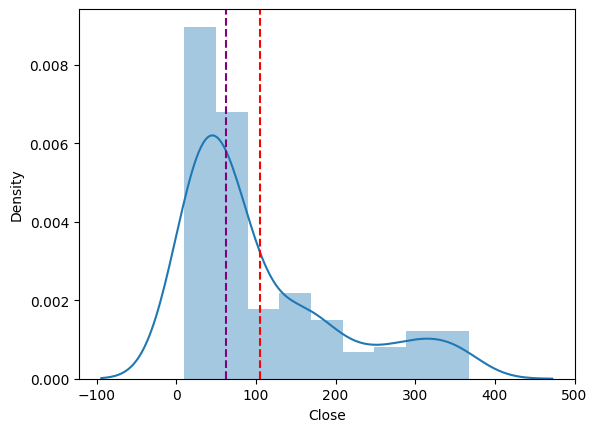

In [22]:
# Chart - 1 visualization code
# Visualizing the distribution of my depended variable
sns.distplot(dataset['Close'])
plt.axvline(x = dataset['Close'].mean(), color = 'red', linestyle = '--')
plt.axvline(x = dataset['Close'].median(), color = 'purple', linestyle = '--')
plt.show()

**From above charts we find that or data is right skewed**

<ipython-input-23-c0392ff90a14>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(dataset['Close']))


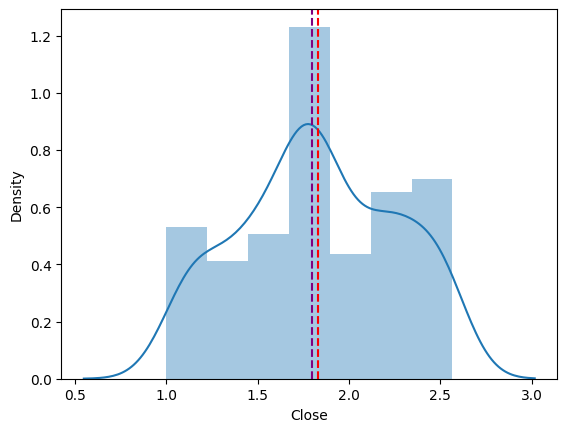

In [23]:
# converting my right skewed distribution to normal distribution using log function.
sns.distplot(np.log10(dataset['Close']))
plt.axvline(x = np.log10(dataset['Close']).mean(), color = 'red', linestyle = '--')
plt.axvline(x = np.log10(dataset['Close']).median(), color = 'purple', linestyle = '--')
plt.show()

##### 1. Why did you pick the specific chart?

**I chose this chart to see the distribution of my dependent variable.**

##### 2. What is/are the insight(s) found from the chart?

**The distribution of the depended variable is found to be right skewed i.e. mean > median > mode.**
**Therefore I applied a log function, this helps me convert the distribution into a normal distribution, as can be seen from both charts.**


In [24]:
# converting my close Values to its log10 values to make it normal distribution
dataset['Close'] = np.log10(dataset['Close'])

In [25]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,1.095518
1,Aug-05,12.58,14.88,12.55,1.127753
2,Sep-05,13.48,14.87,12.27,1.123852
3,Oct-05,13.20,14.47,12.40,1.113609
4,Nov-05,13.35,13.88,12.88,1.127429


#### Chart - 2

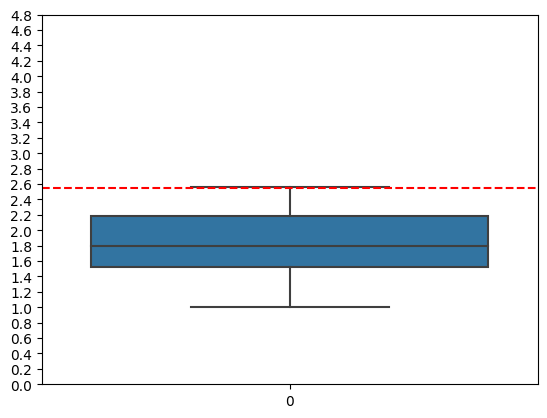

In [33]:
# Chart - 2 visualization code
sns.boxplot(dataset.iloc[:,-1])
plt.axhline(y = 2.55, color = 'r', linestyle = '--')
plt.yticks(np.arange(0,5,0.2))
plt.show()


##### 1. Why did you pick the specific chart?

**I chose This chart to Know The IQR and outliers**

##### 2. What is/are the insight(s) found from the chart?

**The above chart shows me that the median closing is approximately anti log of 1.8, the closing values mostly lie within antilog of 1.5 and antilog of 2.2, we also see that closing has outliers above anti log of 2.55.**

#### Chart - 3

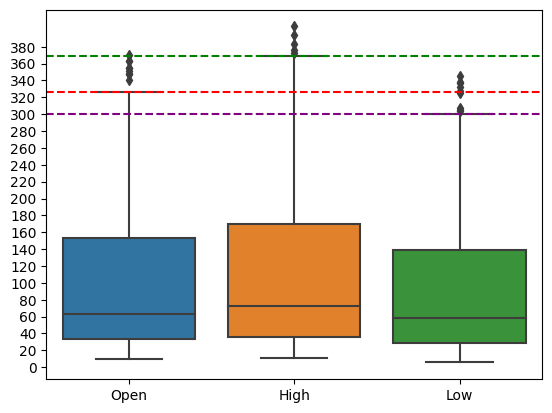

In [41]:
# Chart - 3 visualization code
sns.boxplot(dataset.iloc[:,:-1])
plt.axhline(y = 326, color = 'r', linestyle = '--')
plt.axhline(y = 300, color = 'purple', linestyle = '--')
plt.axhline(y = 369, color = 'green', linestyle = '--')
plt.yticks(np.arange(0,400,20))
plt.show()

##### 1. Why did you pick the specific chart?

**I chose this chart to observe the outliers of independed variables**

##### 2. What is/are the insight(s) found from the chart?

**From Above chart we find that, Low values have outliers above 300, High's have outliers above 369, Open Have outliers above 326, same is represented in above graph by purple line, green line and red line respectively.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This Chart helps me to tackle Outliers**

<ipython-input-44-a45553976666>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


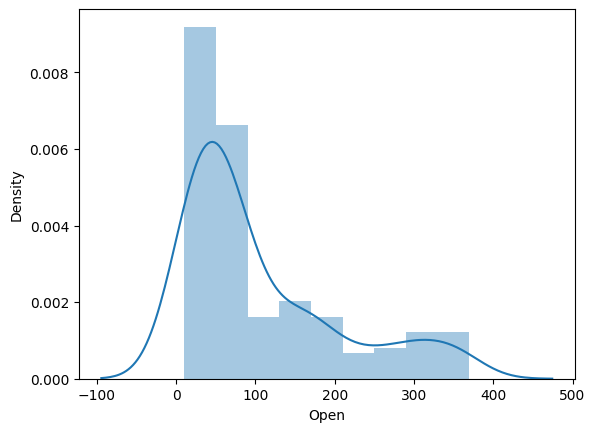

<ipython-input-44-a45553976666>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


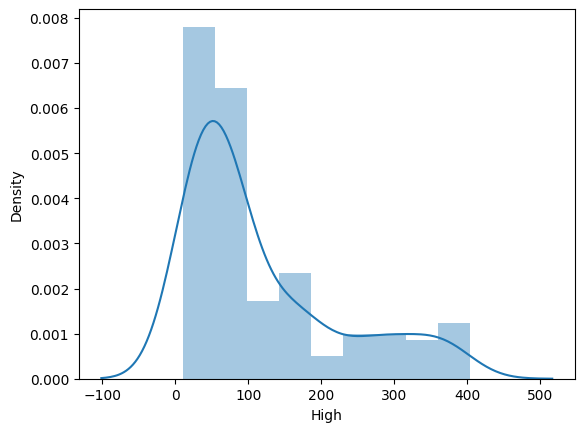

<ipython-input-44-a45553976666>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


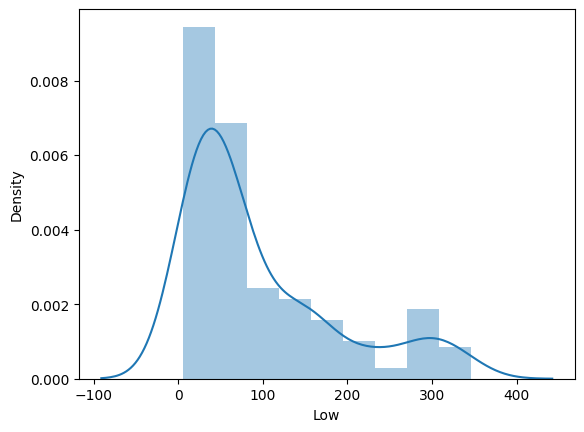

In [44]:
# Visualizing distribution of each variable
for i in dataset.columns:
  if i not in ['Close', 'Date']:
    sns.distplot(dataset[i])
    plt.show()

<ipython-input-46-ba38508e425f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(dataset[i]))


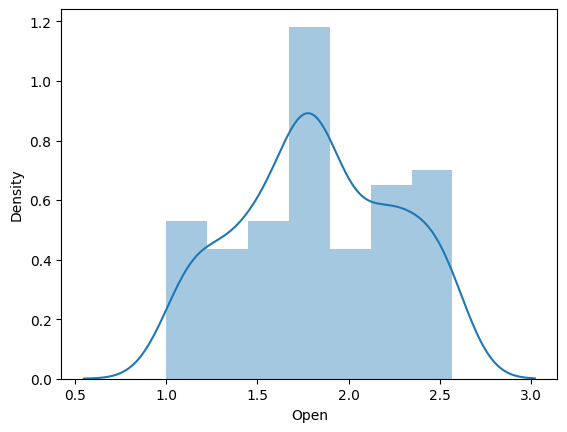

<ipython-input-46-ba38508e425f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(dataset[i]))


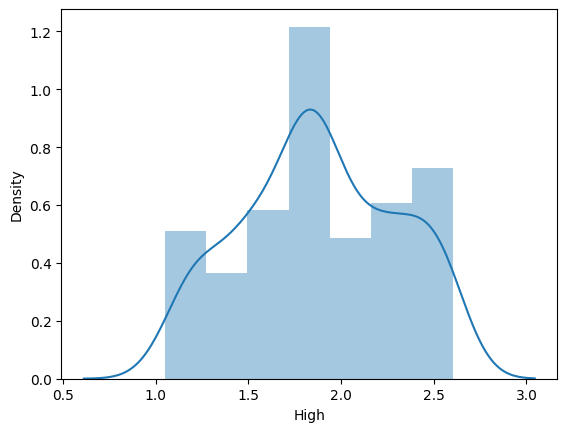

<ipython-input-46-ba38508e425f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(dataset[i]))


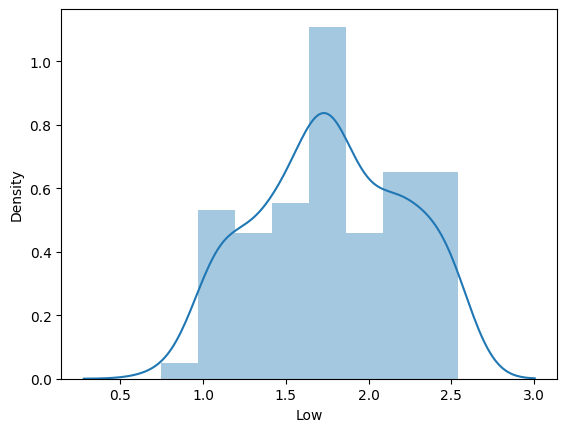

In [46]:
for i in dataset.columns:
  if i not in ['Close', 'Date']:
    sns.distplot(np.log10(dataset[i]))
    plt.show()

In [47]:
for i in dataset.columns:
  if i not in ['Close', 'Date']:
    dataset[i] = np.log10(dataset[i])

dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,1.113943,1.146128,1.051153,1.095518
1,Aug-05,1.099681,1.172603,1.098644,1.127753
2,Sep-05,1.129690,1.172311,1.088845,1.123852
3,Oct-05,1.120574,1.160469,1.093422,1.113609
4,Nov-05,1.125481,1.142389,1.109916,1.127429


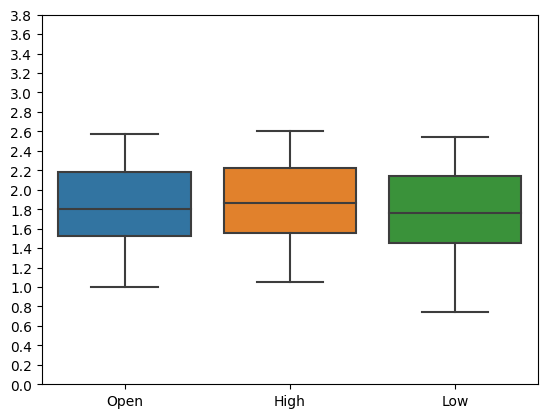

In [49]:
sns.boxplot(dataset.iloc[:,:-1])
# plt.axhline(y = 326, color = 'r', linestyle = '--')
# plt.axhline(y = 300, color = 'purple', linestyle = '--')
# plt.axhline(y = 369, color = 'green', linestyle = '--')
plt.yticks(np.arange(0,4,0.2))
plt.show()

In [50]:
# from above charts we can see that we do not have to tackle any outlier anymore, and all my data is now normally distributed

#### Chart - 3

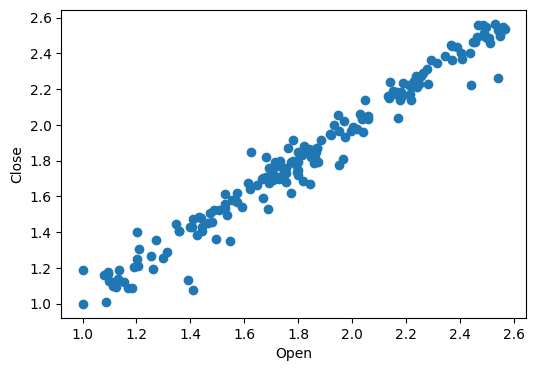

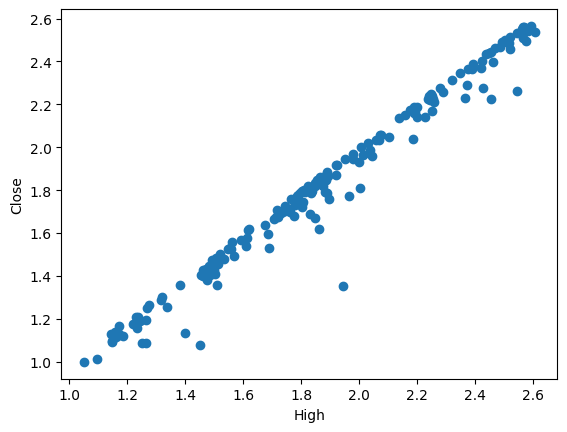

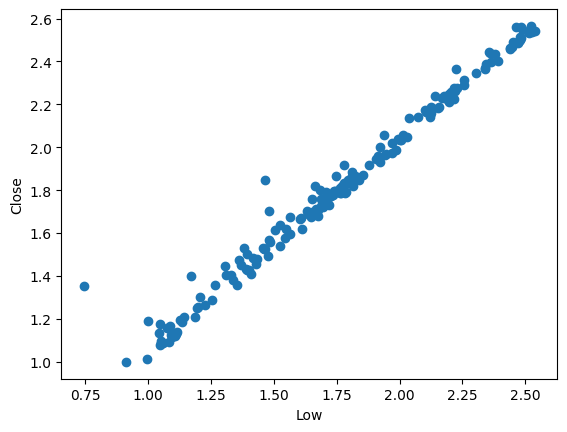

In [48]:
# Chart - 3 visualization code
# here i will scatter plot for each variable with respect to my depended variable.
plt.figure(figsize = (6,4))
for variable in (dataset.columns):
  if variable not in ['Close','Date']:
    plt.scatter(dataset[variable], dataset['Close'])
    plt.xlabel(variable)
    plt.ylabel('Close')
    plt.show()
  else:
    pass

##### 1. Why did you pick the specific chart?

**I chose this chart to observe the relation between independent variables with my depended variable**

##### 2. What is/are the insight(s) found from the chart?

**I found that my depended variables is linearly depended to all other variables.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This Chart helps me identify the ML algorithm I must use to identify the relationship between my other variables with my depended variable i.e. the closing price**

#### Chart - 4

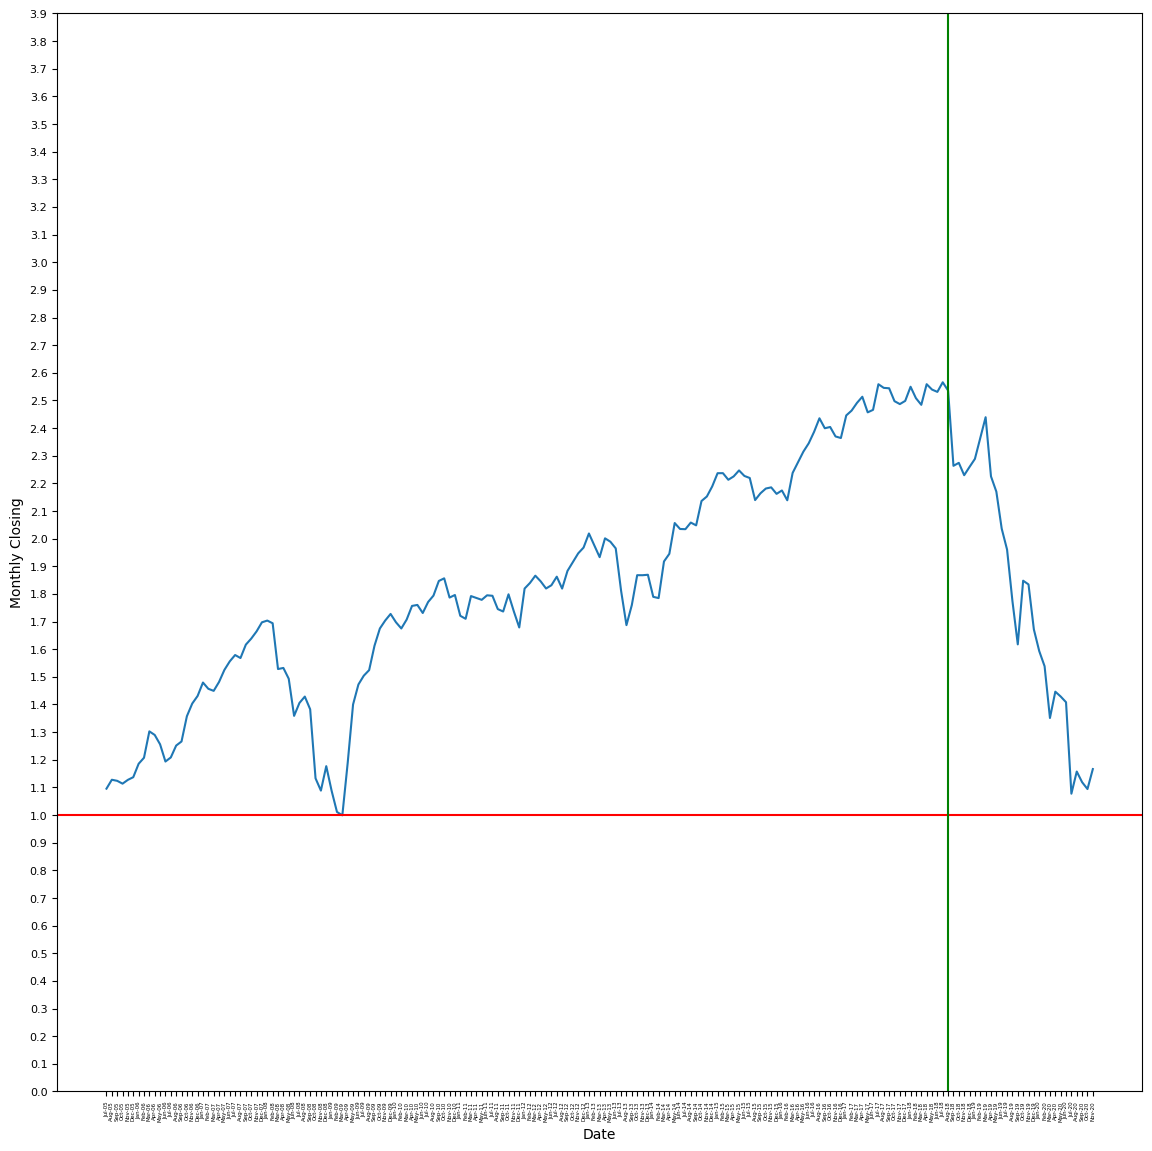

In [56]:
# Chart - 4 visualization code
# To visualize the closing on monthly basis to see if there is any relation.
plt.figure(figsize=(14,14))
plt.plot(dataset['Date'], dataset['Close'])
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.axvline(x = 'Aug-18', color = 'g', linestyle = '-')
plt.xlabel('Date')
plt.ylabel('Monthly Closing')
plt.xticks(rotation = 90, size = 4)
plt.yticks(np.arange(0,4,0.1), size = 8)
plt.show()

##### 1. Why did you pick the specific chart?

**I chose this graph to see the variation in stock closing prices each month year on year**

##### 2. What is/are the insight(s) found from the chart?

**It can be seen That there has been a great growth in the companies prices until the green line or August-september of 2018, and after that a huge decline in the stock prices.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**This Chart helps me explain that the company has done something bad or performed seriously bad since september of 2018, Which is the sign of caution for the survival of this bank**

#### Chart - 5

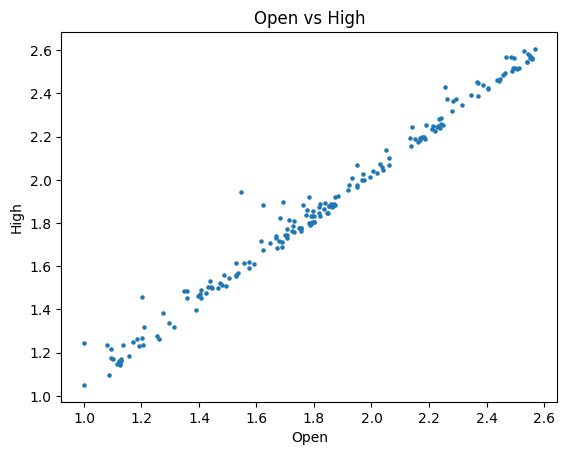

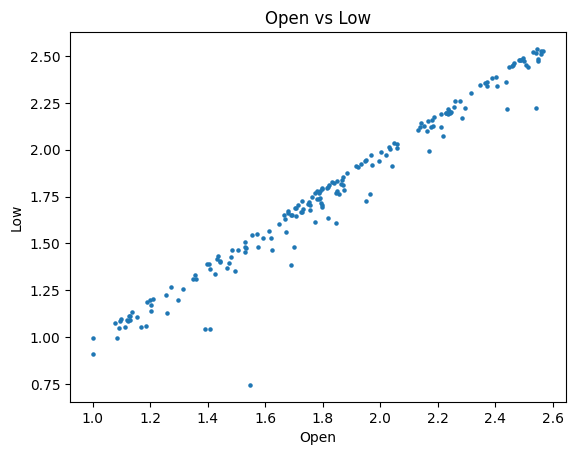

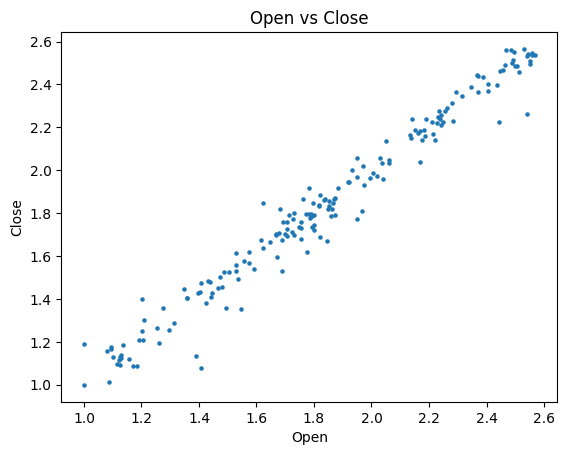

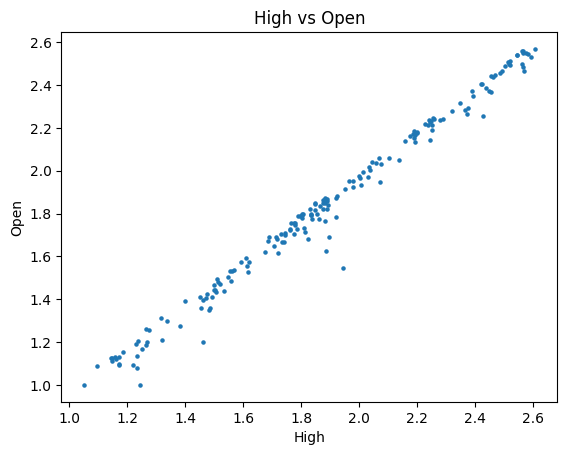

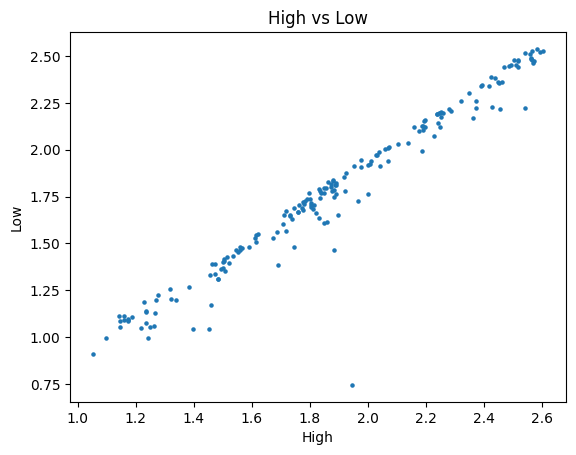

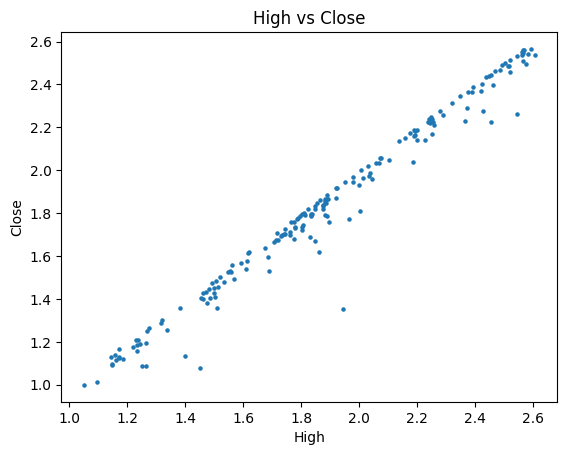

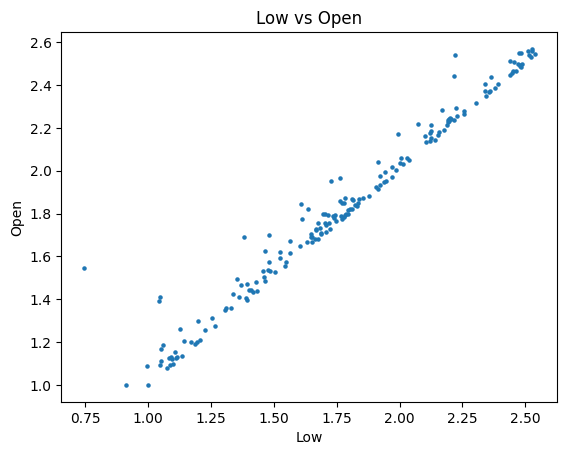

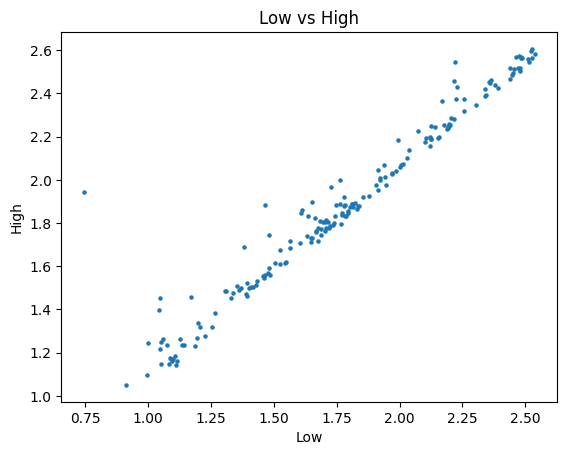

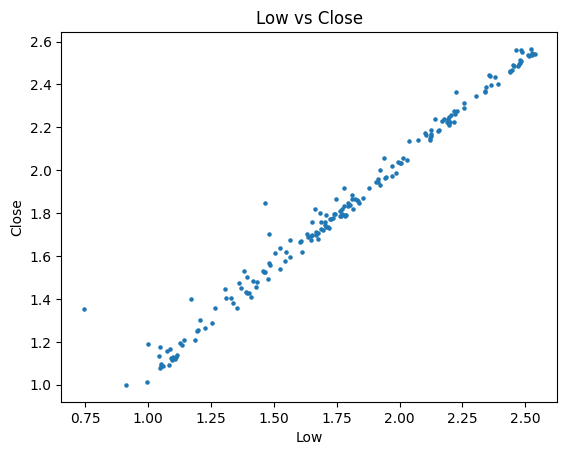

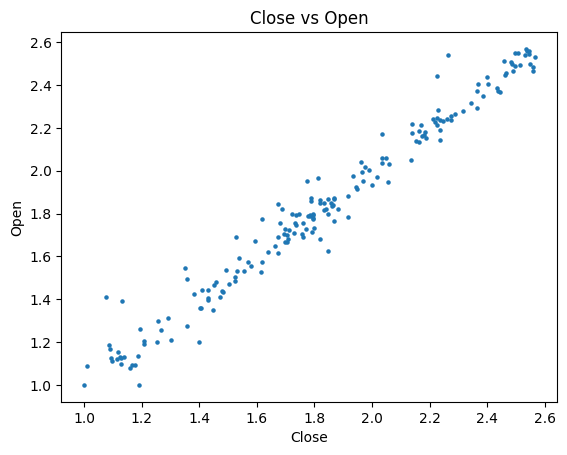

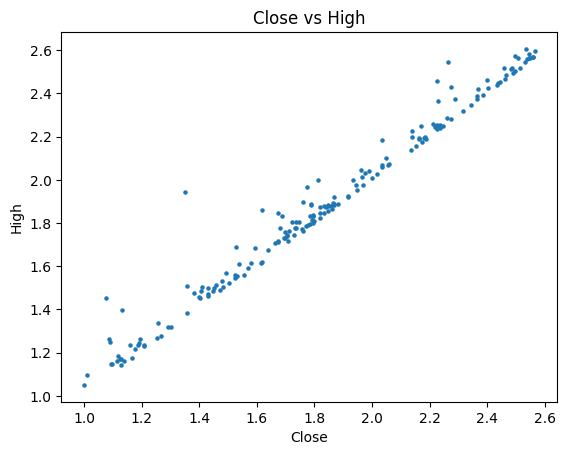

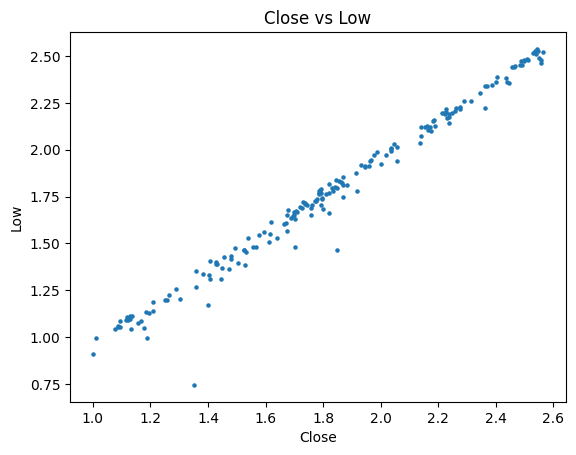

In [57]:
# Chart - 5 visualization code
# Visualising the relation of each variable with others
for var1 in dataset.columns:
  for var2 in dataset.columns:
    if var1 != var2 and var1 != 'Date' and var2 != 'Date':
      plt.scatter(dataset[var1], dataset[var2], s=5)
      plt.xlabel(var1)
      plt.ylabel(var2)
      plt.title(f"{var1} vs {var2}")
      plt.show()

##### 1. Why did you pick the specific chart?

**This charts are to detect if there is a relation within the independent variables**

##### 2. What is/are the insight(s) found from the chart?

**From Above charts we find that all values are interdepeendent on each other**

#### Chart - 5

In [58]:
# Since we oserve that all features are correlated
df2 = dataset.copy()
df2['Avg_OLH_Price'] = df2.iloc[:,1:-1].apply(np.mean,axis = 1) # creating new feature average of all three correlated vaiables

In [59]:
df2.tail()

,Date,Open,High,Low,Close,Avg_OLH_Price
180,Jul-20,1.408240,1.451786,1.045323,1.077368,1.301783
181,Aug-20,1.079181,1.234517,1.073718,1.157457,1.129139
182,Sep-20,1.155336,1.185825,1.105510,1.118926,1.148891
183,Oct-20,1.123852,1.146438,1.083144,1.094122,1.117811
184,Nov-20,1.093772,1.173186,1.086716,1.166430,1.117891


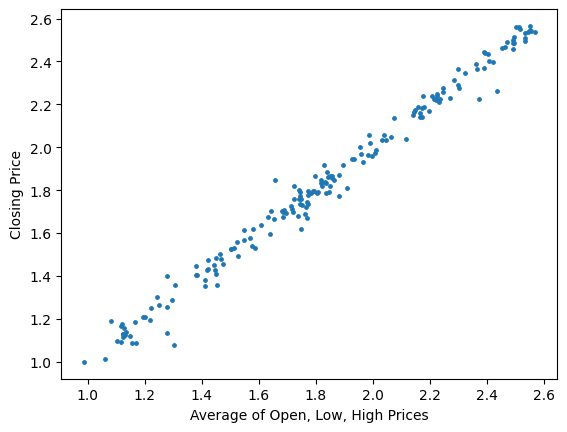

In [60]:
# Chart- 5 Visualisation Code
# Visualisation of the average of open low and high with Closing price
plt.scatter(df2['Avg_OLH_Price'], df2['Close'], s = 6)
plt.xlabel('Average of Open, Low, High Prices')
plt.ylabel('Closing Price')
plt.show()

#### Chart - 6

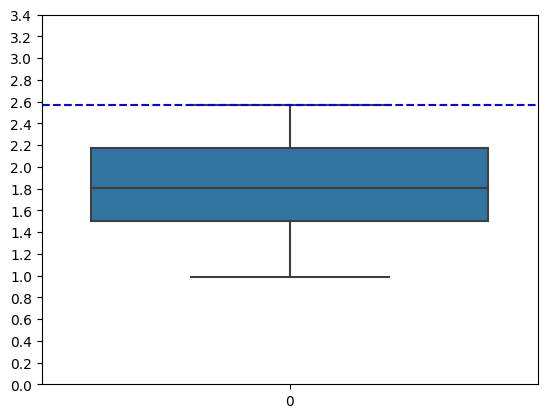

In [66]:
# Chart - 6 Visualisation Code
sns.boxplot(df2['Avg_OLH_Price'])
plt.yticks(np.arange(0,3.5,0.2))
plt.axhline(y = 2.57, color = 'b', linestyle = '--')
plt.show()

##### 1. Why did you pick the specific chart?

**This chart is helpful in Identifying the outliers**

##### 2. What is/are the insight(s) found from the chart?

**We can observe that the values above 326(the dashed horizontal blue line) are outliers and we need to handle them**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**The above information helps us detect the prices which can be flukes and help us get away from the stock market traps**

#### Chart - 7 - Correlation Heatmap



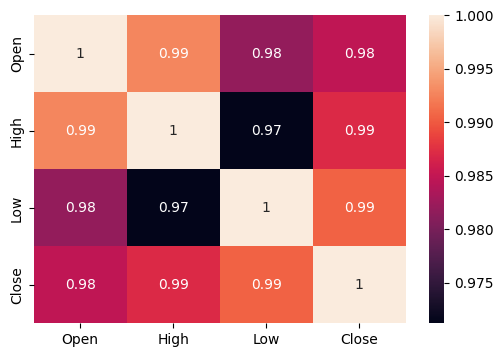

In [67]:
# Correlation Heatmap visualization code
plt.figure(figsize=(6,4))
correlation = dataset.iloc[:,1:].corr()
sns.heatmap(correlation, annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

**This Chart quantifies on how strongly the values are correlated**

##### 2. What is/are the insight(s) found from the chart?

**We find that all variables are highly correlated**

#### Chart - 8 - Pairplot

<Figure size 600x400 with 0 Axes>

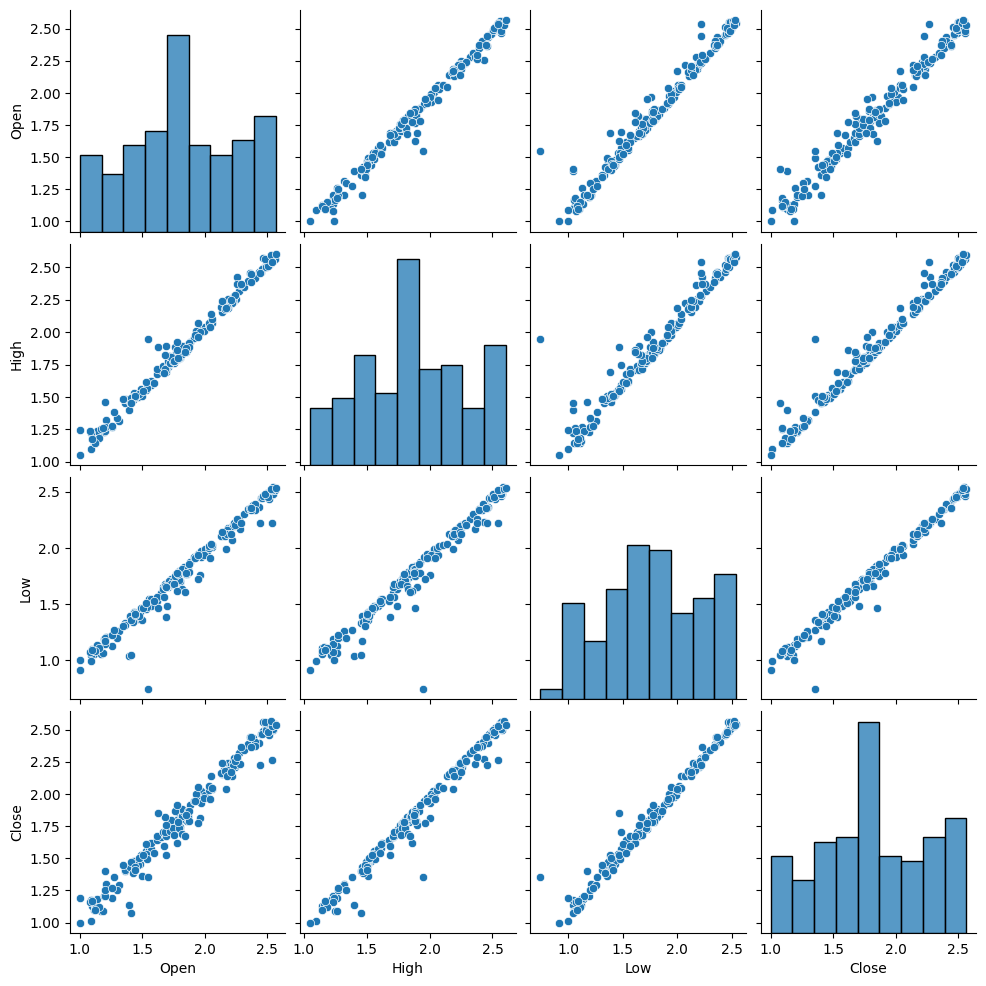

In [68]:
# Pairplot visualization code
plt.figure(figsize=(6,4))
sns.pairplot(dataset)
plt.show()

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [69]:
# Handling Missing Values & Missing Value Imputation

**There Is No Missing Values**

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments
# mean_value = df2['Avg_OLH_Price'].mean()
# mean_value1 = df2['Close'].mean()
# df3 = df2.copy()
# df3['Avg_OLH_Price'] = pd.DataFrame(np.where(df2['Avg_OLH_Price']>326, mean_value, df2['Avg_OLH_Price']))
# df3['Close'] = pd.DataFrame(np.where(df2['Close']>326, mean_value1, df2['Close']))

**As from above data after conversion to log10 values for data to be near normal distribution we found that we do not have any outliers**

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(df2)

       Date      Open      High       Low     Close  Avg_OLH_Price
0    Jul-05  1.113943  1.146128  1.051153  1.095518       1.103741
1    Aug-05  1.099681  1.172603  1.098644  1.127753       1.123642
2    Sep-05  1.129690  1.172311  1.088845  1.123852       1.130282
3    Oct-05  1.120574  1.160469  1.093422  1.113609       1.124821
4    Nov-05  1.125481  1.142389  1.109916  1.127429       1.125929
5    Dec-05  1.130012  1.159567  1.113943  1.137037       1.134507
6    Jan-06  1.136086  1.234517  1.132900  1.185542       1.167834
7    Feb-06  1.190332  1.229682  1.187521  1.207365       1.202511
8    Mar-06  1.209515  1.321184  1.204663  1.302764       1.245121
9    Apr-06  1.313023  1.318063  1.255755  1.289812       1.295614
10   May-06  1.296665  1.338456  1.198657  1.255996       1.277926
11   Jun-06  1.260071  1.264818  1.127105  1.193681       1.217331
12   Jul-06  1.204120  1.235528  1.140508  1.208441       1.193385
13   Aug-06  1.201397  1.269513  1.195900  1.251395       1.22

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Replaced Outliers With mean of the column**

### 3. Categorical Encoding

In [72]:
# Encode your categorical columns

**There is no categorical columns**

#### What all categorical encoding techniques have you used & why did you use those techniques?

**N/A**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [73]:
# Manipulate Features to minimize feature correlation and create new features
# Already have created new columns as avg of open, high and low
df2.head()

,Date,Open,High,Low,Close,Avg_OLH_Price
0,Jul-05,1.113943,1.146128,1.051153,1.095518,1.103741
1,Aug-05,1.099681,1.172603,1.098644,1.127753,1.123642
2,Sep-05,1.129690,1.172311,1.088845,1.123852,1.130282
3,Oct-05,1.120574,1.160469,1.093422,1.113609,1.124821
4,Nov-05,1.125481,1.142389,1.109916,1.127429,1.125929


#### 2. Feature Selection

In [74]:
# Select your features wisely to avoid overfitting
# Since all data are internally correlated I will select only one feature which is avg of rest
# checking multicollinearity using VIF
def vif_calc(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

  return vif

In [75]:
# Date is not relevent for my study and Close is my depended variable
vif_calc(df2[[i for i in df2.columns if i not in ['Close', 'Date']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variables,VIF
0,Open,inf
1,High,inf
2,Low,inf
3,Avg_OLH_Price,inf


In [76]:
# since VIF is infinite for all I chose 1 random feature to be removed as its not worth considering all because VIF is infinite.
vif_calc(df2[[i for i in df2.columns if i not in ['Close', 'Date', 'Avg_OLH_Price']]])

,Variables,VIF
0,Open,2116.460847
1,High,1265.381355
2,Low,482.390858


In [77]:
# did not consider Open as it had the highest VIF.
vif_calc(df2[[i for i in df2.columns if i not in ['Close', 'Date', 'Avg_OLH_Price', 'Open']]])

,Variables,VIF
0,High,272.20678
1,Low,272.20678


**From Above We can conclude that we do not have enough feaures to find appropriate linear fit and that all features are highly collinear which makes it very difficult to select features**

##### What all feature selection methods have you used  and why?

**It is evident from above study that our model will be a overfitting model because of lack of other feature some of which according me are, Volume of orders placed, was there any positive or negative news, has the company given the desired or promised numbers, about corporate actions such as bonuses, dividend etc.**

##### Which all features you found important and why?

**All features here can be said to be of equal importance but are multicollinear**
**I will be selecting only one feature for linear regression and it will be the avg of Low and High because in my study using VIF after removing values with higher VIF i was left with only low and High as the feature of equal importance and since they too are interdependent, I am choosing avg of both as the only feature**

**Date I have ignored because a random Month has no relation with stock price**

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [78]:
# Transform Your data


**I have tranformed all my data to its log10 values and my final data after feature selection is as below:**

In [79]:
# creating a feature which is a avg of Low and High
dataset['Avg_High_Low'] = (dataset['High'] + dataset['Low'])/2
dataset.head()

,Date,Open,High,Low,Close,Avg_High_Low
0,Jul-05,1.113943,1.146128,1.051153,1.095518,1.098640
1,Aug-05,1.099681,1.172603,1.098644,1.127753,1.135623
2,Sep-05,1.129690,1.172311,1.088845,1.123852,1.130578
3,Oct-05,1.120574,1.160469,1.093422,1.113609,1.126945
4,Nov-05,1.125481,1.142389,1.109916,1.127429,1.126153


In [80]:
dataset_new = dataset.loc[:, ['Avg_High_Low', 'Close']]
dataset_new.head()

,Avg_High_Low,Close
0,1.098640,1.095518
1,1.135623,1.127753
2,1.130578,1.123852
3,1.126945,1.113609
4,1.126153,1.127429


### 6. Data Scaling

In [81]:
# Scaling your data

##### Which method have you used to scale you data and why?

**Scaling Here, Being Linear Regression Model is important but because I only have one feature to fit i do not need any feature scaling**

### 8. Data Splitting

In [82]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = dataset_new.iloc[:,:-1].values
y = dataset_new.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why?

**I have taken 80% observations as my training dataset and 20% as test data**

**80% for training because it is important that we learn all feature importance for the output variable, the more  observations we take the better our model will learn and better will be the results**

## ***7. ML Model Implementation***

### ML Model - 1

In [83]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train, y_train)
# Predict on the model
y_pred = regressor.predict(X_test)

In [84]:
# visualising my predicted and actual closing prices of test set
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis = 1))
# Left column is my predicted closing value and right column is my actual closing value

[[1.5  1.53]
 [2.16 2.16]
 [1.73 1.67]
 [2.14 2.15]
 [1.81 1.79]
 [1.48 1.48]
 [2.37 2.36]
 [1.21 1.21]
 [1.14 1.14]
 [2.32 2.29]
 [2.49 2.48]
 [1.98 1.96]
 [2.18 2.19]
 [1.77 1.8 ]
 [2.53 2.53]
 [2.41 2.44]
 [1.86 1.86]
 [1.43 1.43]
 [2.41 2.45]
 [1.71 1.7 ]
 [0.98 1.  ]
 [2.07 2.05]
 [2.19 2.17]
 [1.76 1.77]
 [2.33 2.34]
 [1.67 1.85]
 [2.41 2.4 ]
 [1.13 1.13]
 [2.03 2.03]
 [1.75 1.72]
 [2.57 2.54]
 [2.52 2.56]
 [1.85 1.88]
 [2.23 2.21]
 [1.58 1.62]
 [1.68 1.68]
 [2.41 2.4 ]]


In [85]:
# visualising my predicted and actual closing prices of training set
y_train_pred = regressor.predict(X_train)
print(np.concatenate((y_train_pred.reshape(len(y_train_pred),1), y_train.reshape(len(y_train),1)), axis = 1))

[[2.16 2.19]
 [1.26 1.3 ]
 [1.88 1.81]
 [1.74 1.62]
 [1.12 1.19]
 [1.77 1.76]
 [1.7  1.71]
 [1.58 1.58]
 [1.61 1.7 ]
 [1.25 1.08]
 [1.96 1.93]
 [1.15 1.12]
 [1.57 1.54]
 [1.47 1.46]
 [2.5  2.51]
 [1.86 1.87]
 [2.53 2.55]
 [1.39 1.4 ]
 [1.64 1.67]
 [1.74 1.74]
 [2.53 2.51]
 [1.15 1.09]
 [2.01 2.06]
 [1.51 1.53]
 [2.05 2.06]
 [1.85 1.77]
 [2.54 2.54]
 [1.82 1.83]
 [2.01 1.99]
 [2.15 2.16]
 [1.6  1.64]
 [1.96 1.97]
 [2.04 2.03]
 [2.14 2.17]
 [1.15 1.16]
 [1.97 2.  ]
 [1.83 1.85]
 [1.13 1.12]
 [1.75 1.73]
 [1.89 1.87]
 [2.25 2.28]
 [1.05 1.01]
 [1.27 1.26]
 [2.   2.02]
 [1.76 1.75]
 [1.45 1.43]
 [2.09 2.04]
 [2.22 2.25]
 [2.09 2.14]
 [1.73 1.69]
 [2.56 2.54]
 [1.4  1.45]
 [1.56 1.61]
 [2.17 2.18]
 [1.98 1.96]
 [1.83 1.79]
 [2.29 2.31]
 [1.13 1.18]
 [1.81 1.79]
 [1.5  1.52]
 [1.46 1.5 ]
 [1.84 1.82]
 [1.23 1.25]
 [2.46 2.46]
 [1.52 1.56]
 [1.13 1.17]
 [2.15 2.14]
 [1.43 1.45]
 [1.33 1.36]
 [1.74 1.82]
 [1.85 1.92]
 [1.69 1.7 ]
 [1.85 1.87]
 [1.76 1.74]
 [1.13 1.11]
 [1.11 1.09]
 [2.25 2.26]

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
def Reg_Metrics(y_train_test, y_pred, X):
  from sklearn.metrics import r2_score
  R_squared = r2_score(y_train_test, y_pred)
  adj_r_squared =  (1 - (1-R_squared)*(len(X) - 1)/(len(X) - X.shape[1] - 1))
  mse =  mean_squared_error(y_train_test, y_pred)
  rmse = np.sqrt(mse)
  # results = {'R_squared': R_squared,
  # 'adj_r_Squared': adj_r_squared,
  # 'mse': mse,
  # 'rmse': rmse }
  results = pd.DataFrame()
  results['R_squared'] = [R_squared]
  results['adj_r_Squared'] = [adj_r_squared]
  results['mse'] = [mse]
  results['rmse'] = [rmse]
  ddf = pd.DataFrame(results)
  ddf.set_index('R_squared', inplace = True)

  return ddf


In [87]:
# Visualizing evaluation Metric Score chart
print('Score of Test set using Simple Linear Regression')
print(Reg_Metrics(y_test, y_pred, X_test))

Score of Test set using Simple Linear Regression
           adj_r_Squared       mse      rmse
R_squared                                   
0.993167        0.992971  0.001273  0.035678


In [88]:
print('Score of Training set using Simple Linear Regression')
print(Reg_Metrics(y_train, y_train_pred, X_train))

Score of Training set using Simple Linear Regression
           adj_r_Squared       mse     rmse
R_squared                                  
0.991532        0.991474  0.001487  0.03856


**Above Metrics Score signifies that the model is a good fit in given data**

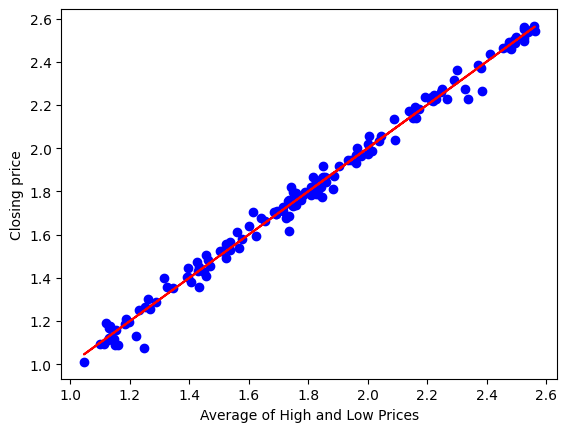

In [89]:
# Since I have a single feature we can plot a graph
# comparison plot of training set and its predicted linear model
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, y_train_pred, color = 'red')
plt.xlabel('Average of High and Low Prices')
plt.ylabel('Closing price')
plt.show()

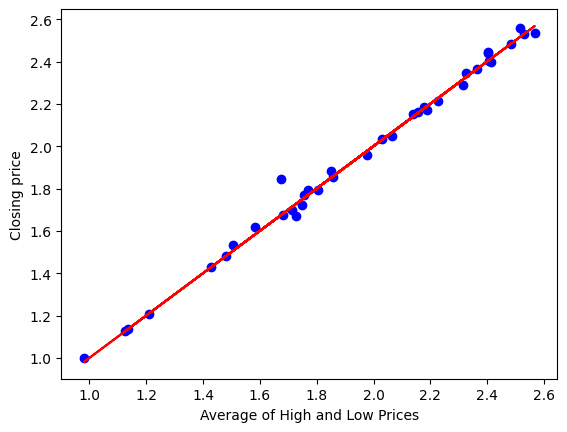

In [90]:
# comparison plot of test set and its predicted linear model
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel('Average of High and Low Prices')
plt.ylabel('Closing price')
plt.show()

In [91]:
print(regressor.coef_)
print(regressor.intercept_)

[1.]
-0.0019203276305856942


#### 2. Cross- Validation & Hyperparameter Tuning

**With the r2 scores generated we do not need any hyper parameter tuning and cross validations, still we will try to see if our model improves**

In [121]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Since there is no hyper parameter to tune in simple regression, I will fit first lasso on my original dataset and then do tuning.
df4 = dataset.iloc[:,1:5]
X1 = df4.iloc[:,:-1].values
y1 = df4.iloc[:,-1].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
lasso = Lasso()
parameter = {'alpha': [0.001*i for i in range(1,11)]}
lasso_regressor = GridSearchCV(lasso, param_grid = parameter, scoring = "neg_mean_squared_error", cv = 5)

# Fit the Algorithm
lasso_regressor.fit(X1_train, y1_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                   0.007, 0.008, 0.009000000000000001, 0.01]},
             scoring='neg_mean_squared_error')

In [122]:
print(f'lasso_regressor = {lasso_regressor.best_params_}')

lasso_regressor = {'alpha': 0.001}


In [123]:
lasso_regressor.best_score_

-0.00177774615267586

In [124]:
# Predict on the model
y1_pred = lasso_regressor.predict(X1_test)
y1_train_pred = lasso_regressor.predict(X1_train)
# print(f'r2 Score of training set using lasso = {r2_score(y1_train, y1_train_pred)}')
# print(f'r2 Score of test set using lasso = {r2_score(y1_test, y1_pred)}')
print('r2 Score of test set using lasso in GridSearchCV')
print(Reg_Metrics(y1_pred, y_test, X_test))
print()
print('r2 Score of training set using lasso in GridSearchCV')
print(Reg_Metrics(y1_train_pred, y_train, X_train))

r2 Score of test set using lasso in GridSearchCV
           adj_r_Squared       mse      rmse
R_squared                                   
0.992007        0.991779  0.001476  0.038424

r2 Score of training set using lasso in GridSearchCV
           adj_r_Squared       mse      rmse
R_squared                                   
0.991701        0.991644  0.001429  0.037803


##### Which hyperparameter optimization technique have you used and why?

**I used GridSearchCv since it is best to go for all possible combination if my dataset is small, as it won't hamper computational time and we can get the best of all**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**near to no change after Tuning**

### ML Model - 2

**We do not need scaling for Decision Tree**

In [104]:
from sklearn.tree import DecisionTreeRegressor
# ML Model - 2 Implementation
regressor1 = DecisionTreeRegressor()

# Fit the Algorithm
regressor1.fit(X1_train, y1_train)
# Predict on the model
y2_pred = regressor1.predict(X1_test)
y2_train_pred = regressor1.predict(X1_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [105]:
# Visualizing evaluation Metric Score chart
print('Score metrics of test set using simple DT')
print(Reg_Metrics(y2_pred, y1_test, X1_test))
print()
print('Score Metrics of training set using Simple DT')
print(Reg_Metrics(y2_train_pred, y1_train, X1_train))

Score metrics of test set using simple DT
           adj_r_Squared       mse     rmse
R_squared                                  
0.985641        0.984336  0.002726  0.05221

Score Metrics of training set using Simple DT
           adj_r_Squared  mse  rmse
R_squared                          
1.0                  1.0  0.0   0.0


#### 2. Cross- Validation & Hyperparameter Tuning

In [106]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter2 = {'max_depth': [2,3], 'min_samples_leaf': [3,4,5], 'min_samples_split':[5,6,7,8,9,10]}
dt_regressor = GridSearchCV(regressor1, param_grid = parameter2, scoring = 'neg_mean_squared_error', cv = 5)
# Fit the Algorithm
dt_regressor.fit(X1_train, y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [107]:
dt_regressor.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}

In [108]:
dt_regressor.best_score_

-0.0051723160547136595

In [109]:
y3_pred = dt_regressor.predict(X1_test)
y3_train_pred = dt_regressor.predict(X1_train)
print('Score metrics of test set using DT_regressor')
print(Reg_Metrics(y3_pred, y1_test, X1_test))
print()
print('Score Metrics of training set using Simple DT_regressor')
print(Reg_Metrics(y3_train_pred, y1_train, X1_train))

Score metrics of test set using DT_regressor
           adj_r_Squared       mse      rmse
R_squared                                   
0.965385        0.962239  0.006244  0.079018

Score Metrics of training set using Simple DT_regressor
           adj_r_Squared       mse      rmse
R_squared                                   
0.980913        0.980516  0.003289  0.057347


##### Which hyperparameter optimization technique have you used and why?

**I used GridSearchCv since it is best to go for all possible combination if my dataset is small, as it won't hamper computational time and we can get the best of all**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes i was able to generalize the training data using hyper parameter tuning and overcome the default problem with decision tree of overfitting the data**

### ML Model - 3

In [110]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsRegressor
# Using KNN model, as it works good with small dataset
regressor2 = KNeighborsRegressor()
# Fit the Algorithm
# I have not done the important process of feature scaling for knn
# this is because all my features are in the same unit and that is currency and are of a single stock over months.
# therefore feature scaling is not much needed here.
regressor2.fit(X1_train, y1_train)

# Predict on the model
y4_pred = regressor2.predict(X1_test)
y4_train_pred = regressor2.predict(X1_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [111]:
# Visualizing evaluation Metric Score chart
print('Score metrics of test set using simple KNN')
print(Reg_Metrics(y4_pred, y1_test, X1_test))
print()
print('Score Metrics of training set using Simple KNN')
print(Reg_Metrics(y4_train_pred, y1_train, X1_train))

Score metrics of test set using simple KNN
           adj_r_Squared       mse      rmse
R_squared                                   
0.993422        0.992825  0.001202  0.034671

Score Metrics of training set using Simple KNN
           adj_r_Squared       mse    rmse
R_squared                                 
0.992493        0.992336  0.001303  0.0361


#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter2 = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20], 'p':[1,2,3], 'weights': ['uniform', 'distance']}
knn_regressor = GridSearchCV(regressor2, param_grid = parameter2, scoring = 'neg_mean_squared_error', cv = 5)
# Fit the Algorithm
knn_regressor.fit(X1_train, y1_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         15, 16, 17, 18, 19, 20],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [113]:
knn_regressor.best_params_

{'n_neighbors': 4, 'p': 3, 'weights': 'distance'}

In [114]:
knn_regressor.best_score_

-0.0018433840495216188

In [115]:
y5_pred = knn_regressor.predict(X1_test)
y5_train_pred = knn_regressor.predict(X1_train)
print('Score metrics of test set using knn_regressor')
print(Reg_Metrics(y5_pred, y1_test, X1_test))
print()
print('Score Metrics of training set using knn_regressor')
print(Reg_Metrics(y5_train_pred, y1_train, X1_train))

Score metrics of test set using knn_regressor
           adj_r_Squared       mse      rmse
R_squared                                   
0.993416        0.992817  0.001226  0.035011

Score Metrics of training set using knn_regressor
           adj_r_Squared  mse  rmse
R_squared                          
1.0                  1.0  0.0   0.0


##### Which hyperparameter optimization technique have you used and why?

**GridSearchCV because of small dataset**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**yes hyperparameter tuning worked and the score increased**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**I have used r2, adjusted r2, mse and rmse Score as the evaluation parameter because this is regression problem.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**I will choose linear regression with lasso or L1 regularization as my model for these dataset because it is giving me the best and generalised results as can be seen from the evaluation metrics score generated for the test set and the training set as well.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [126]:
lasso1 = Lasso(alpha = 0.001)
lasso1.fit(X1_train, y1_train)
y6_pred = lasso1.predict(X1_test)
y6_train_pred = lasso1.predict(X1_train)
print('Score Metrics of training set of my selected model')
print(Reg_Metrics(y6_pred, y1_test, X1_test))
print()
print('Score Metrics of test set of my selected model')
print(Reg_Metrics(y6_train_pred, y1_train, X1_train))

Score Metrics of training set of my selected model
           adj_r_Squared       mse      rmse
R_squared                                   
0.992007        0.991281  0.001476  0.038424

Score Metrics of test set of my selected model
           adj_r_Squared       mse      rmse
R_squared                                   
0.991701        0.991528  0.001429  0.037803


In [119]:
lasso1.coef_

array([0.  , 0.34, 0.6 ])

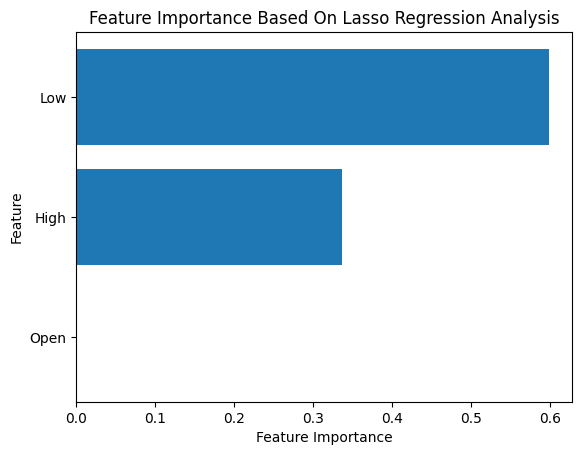

In [120]:
# Visualising The selected model feature importance
plt.barh(df4.iloc[:,:-1].columns, lasso1.coef_)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Based on lasso regression analysis'.title())
plt.show()

**From Above observation it is evident that the Low feature values has the highest impact on my dataset**

# **Conclusion**

**From EDA studies :**
1. we saw that The company has performed very well from mar-2009 to sept-2018.
2. There has been a very sharp fall in stock price from Aug 2018 to Aug 2020 with some fake rises.
3. We saw that the stock takes support at a price of Antilog of 1 which is nearly 10 Rs.
4. We also saw that all of my data are linearly correlated to each other.

**From ML algorithms we find that :**
1. Lasso with alpha = 0.001 has the best of all fit as features is linearly depended to the Close price, with Adjusted r2 of 0.9915 for test set and 0.9912 for training set, seems very generalised and best fit.
2. We saw that simple DT is giving me an overfit result as the training set has 100% accuracy but test set has 97% accuracy as per adjusted r2 score.
3. We even saw that KNN is giving me fine result with 100% accuracy for training data set and 99.28% accuracy for test dataset, seems good but its overfitting.
4. In my best fit we also saw that feature named Low has highest impact on the Closing price for the month while open price has Zero impact on Close price.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***